## Regresiones logisticas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/My Drive/DS4A/CleanDB_FULL_DsOrigin_RandomSample_NumCat.csv") 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df["NACIDO_VIVO_INV"] = df["NACIDO_VIVO_INV"].astype('category')
df["SEG_SOCIAL_CAT"] = df["SEG_SOCIAL_CAT"].astype('category')
df["SEXO_CAT"] = df["SEXO_CAT"].astype('category')
df['SITIO_EVENTO_CAT'] = df["SITIO_EVENTO_CAT"].astype('category')
df['TIEMPO_GESTACION_CAT'] = df["TIEMPO_GESTACION_CAT"].astype('category')
df['TIPO_PARTO_CAT'] = df["TIPO_PARTO_CAT"].astype('category')
df['AREA'] = df["AREA"].astype('category')


In [7]:
columns = ['NUMERO_EMBARAZOS','PESO','SEXO_CAT','SEG_SOCIAL_CAT','SITIO_EVENTO_CAT','TIEMPO_GESTACION_CAT','TIPO_PARTO_CAT','AREA']
df_log = df.loc[:,columns]
df_log['SEXO_CAT'] = df.SEXO_CAT.cat.codes
df_log['SEG_SOCIAL_CAT'] = df.SEG_SOCIAL_CAT.cat.codes
df_log['SITIO_EVENTO_CAT'] = df.SITIO_EVENTO_CAT.cat.codes
df_log['TIEMPO_GESTACION_CAT'] = df.TIEMPO_GESTACION_CAT.cat.codes
df_log['TIPO_PARTO_CAT'] = df.TIPO_PARTO_CAT.cat.codes
df_log['AREA'] = df.AREA.cat.codes
df_log['NACIDO_VIVO_INV'] = df.NACIDO_VIVO_INV.cat.codes
df_log['Intercept'] = 1

In [8]:
logit = sm.Logit(df_log['NACIDO_VIVO_INV'], df_log[columns].astype(float))
logit_res = logit.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.111122
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        NACIDO_VIVO_INV   No. Observations:              1579068
Model:                          Logit   Df Residuals:                  1579060
Method:                           MLE   Df Model:                            7
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                  0.5569
Time:                        22:39:13   Log-Likelihood:            -1.7547e+05
converged:                       True   LL-Null:                   -3.9604e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
NUMERO_EMBARAZOS         0.0518      0.000    184.826      0.000       0.051       0.052
PESO                    -0.5821      0.002   -264.638      0.000      -0.586      -0.578
SEXO_CAT                 3.1403      0.011    293.095      0.000       3.119       3.161
SEG_SOCIAL_CAT          -0.1695      0.004    -37.969      0.000      -0.178      -0.161
SITIO_EVENTO_CAT         1.7645      0.016    110.581      0.000       1.733       1.796
TIEMPO_GESTACION_CAT    -1.0609      0.004   -292.069      0.000      -1.068      -1.054
TIPO_PARTO_CAT           0.0240      0.007      3.400      0.001       0.010       0.038
AREA                    -0.8039      0.029    -27.847      0.000      -0.861      -0.747
========================================================================================
"""

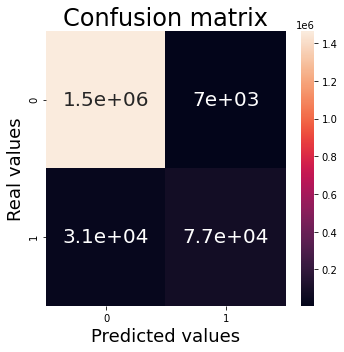

In [9]:
cm = logit_res.pred_table(threshold=0.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,annot_kws={"size": 20})
# labels, title and ticks
plt.xlabel('Predicted values',fontsize=18)
plt.ylabel('Real values',fontsize=18)
plt.title('Confusion matrix',fontsize=24)
plt.tight_layout()

In [10]:
logit = sm.Logit(df_log['NACIDO_VIVO_INV'], df_log[['AREA','SITIO_EVENTO_CAT']].astype(float))
logit_res = logit.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.685539
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        NACIDO_VIVO_INV   No. Observations:              1579068
Model:                          Logit   Df Residuals:                  1579066
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                  -1.733
Time:                        22:39:24   Log-Likelihood:            -1.0825e+06
converged:                       True   LL-Null:                   -3.9604e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
AREA                -1.6125      0.015   -108.462      0.000      -1.642      -1.583
SITIO_EVENTO_CAT     0.5613      0.008     73.906      0.000       0.546       0.576
====================================================================================
"""

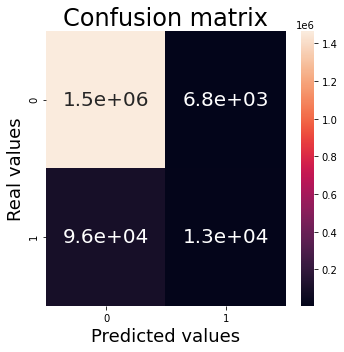

In [11]:
cm = logit_res.pred_table(threshold=0.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,annot_kws={"size": 20})
# labels, title and ticks
plt.xlabel('Predicted values',fontsize=18)
plt.ylabel('Real values',fontsize=18)
plt.title('Confusion matrix',fontsize=24)
plt.tight_layout()

In [12]:
logit = sm.Logit(df_log['NACIDO_VIVO_INV'], df_log[['NUMERO_EMBARAZOS','TIEMPO_GESTACION_CAT','TIPO_PARTO_CAT',]].astype(float))
logit_res = logit.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.170720
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        NACIDO_VIVO_INV   No. Observations:              1579068
Model:                          Logit   Df Residuals:                  1579065
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                  0.3193
Time:                        22:39:36   Log-Likelihood:            -2.6958e+05
converged:                       True   LL-Null:                   -3.9604e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
NUMERO_EMBARAZOS         0.0486      0.000    192.894      0.000       0.048       0.049
TIEMPO_GESTACION_CAT    -1.3313      0.002   -628.726      0.000      -1.335      -1.327
TIPO_PARTO_CAT           0.4256      0.005     78.585      0.000       0.415       0.436
========================================================================================
"""

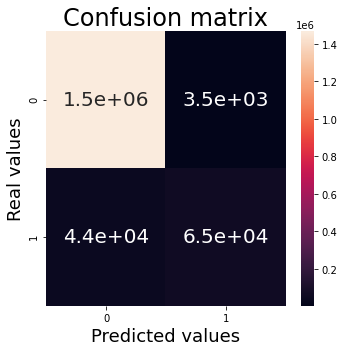

In [13]:
cm = logit_res.pred_table(threshold=0.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,annot_kws={"size": 20})
# labels, title and ticks
plt.xlabel('Predicted values',fontsize=18)
plt.ylabel('Real values',fontsize=18)
plt.title('Confusion matrix',fontsize=24)
plt.tight_layout()

In [14]:
logit = sm.Logit(df_log['NACIDO_VIVO_INV'], df_log[['NUMERO_EMBARAZOS']].astype(float))
logit_res = logit.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.688618
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        NACIDO_VIVO_INV   No. Observations:              1579068
Model:                          Logit   Df Residuals:                  1579067
Method:                           MLE   Df Model:                            0
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                  -1.746
Time:                        22:39:47   Log-Likelihood:            -1.0874e+06
converged:                       True   LL-Null:                   -3.9604e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
NUMERO_EMBARAZOS    -0.0202      0.000    -92.114      0.000      -0.021      -0.020
====================================================================================
"""

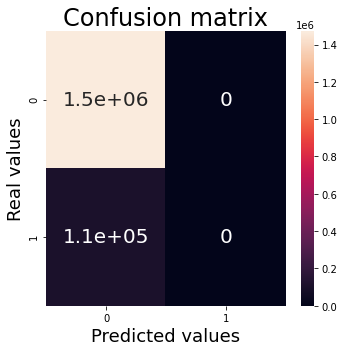

In [15]:
cm = logit_res.pred_table(threshold=0.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,annot_kws={"size": 20})
# labels, title and ticks
plt.xlabel('Predicted values',fontsize=18)
plt.ylabel('Real values',fontsize=18)
plt.title('Confusion matrix',fontsize=24)
plt.tight_layout()

In [16]:
logit = sm.Logit(df_log['NACIDO_VIVO_INV'], df_log[['PESO']].astype(float))
logit_res = logit.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.227695
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        NACIDO_VIVO_INV   No. Observations:              1579068
Model:                          Logit   Df Residuals:                  1579067
Method:                           MLE   Df Model:                            0
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                 0.09216
Time:                        22:39:58   Log-Likelihood:            -3.5955e+05
converged:                       True   LL-Null:                   -3.9604e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PESO          -0.5017      0.001   -774.068      0.000      -0.503      -0.500
==============================================================================
"""

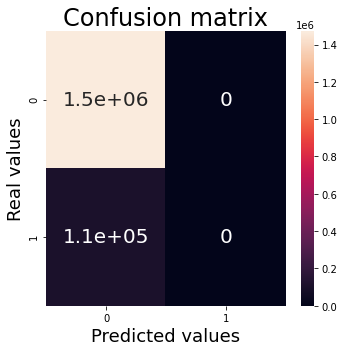

In [17]:
cm = logit_res.pred_table(threshold=0.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,annot_kws={"size": 20})
# labels, title and ticks
plt.xlabel('Predicted values',fontsize=18)
plt.ylabel('Real values',fontsize=18)
plt.title('Confusion matrix',fontsize=24)
plt.tight_layout()

In [18]:
logit = sm.Logit(df_log['NACIDO_VIVO_INV'], df_log[['SEXO_CAT']].astype(float))
logit_res = logit.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.578291
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        NACIDO_VIVO_INV   No. Observations:              1579068
Model:                          Logit   Df Residuals:                  1579067
Method:                           MLE   Df Model:                            0
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                  -1.306
Time:                        22:40:09   Log-Likelihood:            -9.1316e+05
converged:                       True   LL-Null:                   -3.9604e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SEXO_CAT      -1.3753      0.003   -517.035      0.000      -1.381      -1.370
==============================================================================
"""

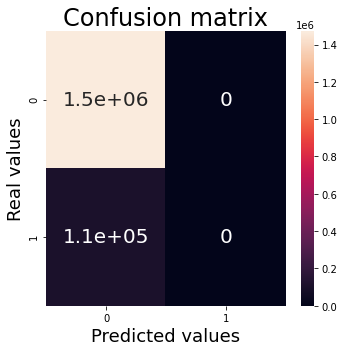

In [19]:
cm = logit_res.pred_table(threshold=0.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,annot_kws={"size": 20})
# labels, title and ticks
plt.xlabel('Predicted values',fontsize=18)
plt.ylabel('Real values',fontsize=18)
plt.title('Confusion matrix',fontsize=24)
plt.tight_layout()

In [20]:
logit = sm.Logit(df_log['NACIDO_VIVO_INV'], df_log[['SEG_SOCIAL_CAT']].astype(float))
logit_res = logit.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.432683
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        NACIDO_VIVO_INV   No. Observations:              1579068
Model:                          Logit   Df Residuals:                  1579067
Method:                           MLE   Df Model:                            0
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                 -0.7251
Time:                        22:40:20   Log-Likelihood:            -6.8324e+05
converged:                       True   LL-Null:                   -3.9604e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SEG_SOCIAL_CAT    -1.3373      0.002   -622.320      0.000      -1.342      -1.333
==================================================================================
"""

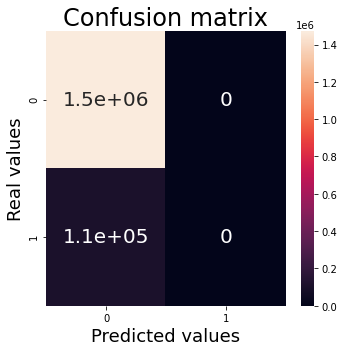

In [21]:
cm = logit_res.pred_table(threshold=0.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,annot_kws={"size": 20})
# labels, title and ticks
plt.xlabel('Predicted values',fontsize=18)
plt.ylabel('Real values',fontsize=18)
plt.title('Confusion matrix',fontsize=24)
plt.tight_layout()